<center>

## **ETL (Extract - Transform - Load)**<br>
**_PROYECTO INDIVIDUAL 1_**<br>

</center>

**Machine Learning Operations (MLOps)**<br>
**Data Scientis:** _Ilbert Ferney Alarcon_ 😎<br>
**Cohorte 11**<br>

-----------------------------------------

## 2. Preparación datos de Peliculas

La preparación de datos para el proceso de Extracción, Transformación y Carga (ETL) desempeña un papel fundamental. La primera etapa de este proceso implica la extracción de los datos relevantes de múltiples fuentes, como bases de datos, archivos CSV o APIs de películas. Es importante definir una estrategia adecuada para extraer los datos, asegurando la integridad y la calidad de la información recopilada. Esto puede implicar la selección de las características más relevantes, como titulos, género, director, reparto, calificación y reseñas de películas, para alimentar el sistema de recomendación.

Una vez extraídos los datos, la transformación se convierte en una tarea esencial. Esto implica limpiar los datos, manejar valores nulos o faltantes, normalizar los formatos de fechas o categorías, y realizar operaciones de agrupamiento o agregación para obtener información útil. Además, se pueden crear variables adicionales. En resumen, la preparación de datos en un proyecto de recomendación de películas para el ETL implica la extracción y transformación de datos de diversas fuentes, con el objetivo de obtener un conjunto de datos limpios, enriquecidos y estructurados que pueda ser utilizado por el sistema de recomendación para ofrecer recomendaciones precisas y relevantes a los usuarios.

### 2.1 Cargar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import session_info
import ydata_profiling as pp
import ast

### 2.2 Cargar los Datasets con datos

In [2]:
movies_df=pd.read_csv('DATASET\movies_dataset.csv',encoding='Latin-1',low_memory=False)
credits_df=pd.read_csv('DATASET\credits.csv',encoding='Latin-1',low_memory=False)

**_`movies_dataset.csv: `_** Esta Dataset contiene la informacion de las peliculas<br>
**_`credits.csv: `_** Este Dataset contiene diccionarios con el casting y los creditos de las peliculas contenidas en el Dataset **_`movies_dataset.csv `_** ☝️<br>

***Diccionario de Datos***

<center>

| **Característica** | **Descripción** |
| :---------------: | :------------|
|adult|_Indica si la película tiene califiación X, exclusiva para adultos._|
|belongs_to_collection|_Un diccionario que indica a que franquicia o serie de películas pertenece la película_|
|budget|_El presupuesto de la película, en dólares_|
|genres|_Un diccionario que indica todos los géneros asociados a la película_|
|homepage|_La página web oficial de la película_|
|id|_ID de la pelicula_|
|imdb_id|_IMDB ID de la pelicula_|
|original_language|_Idioma original en la que se grabo la pelicula_|
|original_title|_Titulo original de la pelicula_|
|overview|_Pequeño resumen de la película_|
|popularity|_Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase)_|
|poster_path|_URL del póster de la película_|
|production_companies|_Lista con las compañias productoras asociadas a la película_|
|production_countries|_Lista con los países donde se produjo la película_|
|release_date|_Fecha de estreno de la película_|
|revenue|_Recaudación de la pelicula, en dolares_|
|runtime|_Duración de la película, en minutos_|
|spoken_languages|_Lista con los idiomas que se hablan en la pelicula_|
|status|_Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc)_|
|tagline|_Frase celebre asociadaa la pelicula_|
|title|_Titulo de la pelicula_|
|video|_Indica si hay o no un trailer en video disponible en TMDB_|
|vote_average|_Puntaje promedio de reseñas de la pelicula_|
|vote_count|_Numeros de votos recibidos por la pelicula, en TMDB_|

<center>

In [3]:
movies_df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [4]:
movies_df.shape

(45466, 24)

☝️ Como se evidencia en la linea anterior, la base de datos original contiene 45466 registros para 24 columnas, mas adelante veremos que con el proceso de ETL junto con los requerimientos estos registros seran depurados.

Eliminar registros duplicados filtrados por el ID

In [5]:
movies_df.drop_duplicates(subset='id', inplace=True)

In [6]:
movies_df.shape

(45436, 24)

### 2.3 Requerimientos MVP (ETL DATASET MOVIES)

Algunos campos, como **_`belongs_to_collection`_**, **_`roduction_companies`_** y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

#### 2.3.1 Los valores nulos del campo **`release_date`** deben eliminarse.

In [7]:
movies_df.dropna(subset=['release_date'], inplace=True)

In [8]:
movies_df.shape

(45349, 24)

#### 2.3.2 Eliminacion de las columnas que no se usaran en el futuro analisis

In [9]:
movies_df.drop(columns=['adult','homepage','imdb_id','original_title','poster_path','video',], inplace=True)

In [10]:
movies_df.shape

(45349, 18)

#### 2.3.3 Los valores nulos de los campos **_`revenue`_**, **_`budget`_** deben ser rellenados por el número 0.

#### 2.3.4 Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [11]:
movies_df['revenue']=movies_df['revenue'].fillna(0)

In [12]:
movies_df['budget']=pd.to_numeric(movies_df['budget'],downcast='float',errors='coerce')
movies_df['budget']=movies_df['budget'].fillna(0)
movies_df['return']=movies_df['revenue'].divide(movies_df['budget']).fillna(0)

In [13]:
movies_df['return'].replace([np.inf, -np.inf], np.nan, inplace=True)
movies_df['return'].fillna(0,inplace=True)

en la columna Budget se encontraron valores nulos, referentes a imagenes, por lo cual se reemplazar por 0

#### 2.3.5 De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [14]:
movies_df['release_date']=pd.to_datetime(movies_df['release_date'],format='%Y-%m-%d',errors='coerce')
movies_df[movies_df['release_date'].isna()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return
19730,0.065736,0.0,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
29503,1.931659,0.0,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35587,2.185485,0.0,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,Beware Of Frost Bites,False,4.3,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
movies_df=movies_df.dropna(subset=['release_date'])

In [16]:
movies_df['release_year']=movies_df['release_date'].dt.year

#### 2.3.6 Desanidado campo **_`belong to collection`_**<br>

Con el siguiente codigo se desempaqueta el campo **_`belong to collection`_**, el cual tiene una estructura de tipo diccionario y en formato json, extrayendo el nombre de los generos de las peliculas junto con su ID_Genero.

In [17]:
# Rellenar los valores nulos de la columna 'belongs_to_collection' con '{}'
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].fillna('{}')

# Reiniciar los índices del DataFrame
movies_df.reset_index(drop=True, inplace=True)

# Normalizar los datos JSON en la columna 'belongs_to_collection' y crear un nuevo DataFrame 'df1'
df_aux = pd.json_normalize(movies_df['belongs_to_collection'].map(eval))

In [18]:
movies_df['collection_name']=df_aux['name']
movies_df['idcollection']=df_aux['id']
movies_df.drop(columns=['belongs_to_collection'],inplace=True)

#### 2.3.7 Desanidado campo **_`genres`_**<br>

Con el siguiente codigo se desempaqueta el campo **_`genres`_**, el cual tiene una estructura de tipo diccionario y en formato json, extrayendo el nombre de los generos de las peliculas junto con su ID_Genero.

In [19]:
# Definir una función lambda para obtener los nombres de una lista de diccionarios
get_names = lambda lst: [d['name'] for d in lst]

# Definir una función lambda para obtener los IDs de una lista de diccionarios
get_id = lambda lst: [d['id'] for d in lst]

# Convertir la columna 'genres' del DataFrame en un objeto de lista de diccionarios utilizando map() y eval()
movies_df['genres'] = movies_df['genres'].map(eval)

# Aplicar la función get_names a la columna 'genres' para obtener los nombres de los géneros
movies_df['genres_name'] = movies_df['genres'].apply(get_names)

# Aplicar la función get_id a la columna 'genres' para obtener los IDs de los géneros
movies_df['idgenres'] = movies_df['genres'].apply(get_id)

# Eliminar la columna 'genres' del DataFrame utilizando drop()
movies_df.drop(columns='genres', inplace=True)

#### 2.3.8 Desanidado campo **_`production_companies`_**<br>

Con el siguiente codigo se desempaqueta el campo **_`production_companies`_**, el cual tiene una estructura de tipo diccionario y en formato json, extrayendo el nombre de los generos de las peliculas junto con su ID_Genero.

In [20]:
def extract_names(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    if isinstance(row, list):
        names = [entry['name'] for entry in row]
        return names
    return []


def extract_ids(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    if isinstance(row, list):
        ids = [entry['id'] for entry in row]
        return ids
    return []


def extract_isocode(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    if isinstance(row, list):
        isocode = [entry['iso_3166_1'] for entry in row]
        return isocode
    return []


def extract_isospoken(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    if isinstance(row, list):
        isospoken = [entry['iso_639_1'] for entry in row]
        return isospoken
    return []

# Definimos las funciones que seran usadas mas adelante

In [21]:
# Aplicar la función a la columna 'data' para crear una nueva columna 'names'
movies_df['pcomp_names'] = movies_df['production_companies'].apply(extract_names)
movies_df['idpcomp'] = movies_df['production_companies'].apply(extract_ids)

# Eliminar la columna 'production_companies' del DataFrame utilizando drop()
movies_df.drop(columns='production_companies', inplace=True)

#### 2.3.9 Desanidado campo **_`production_countries`_**<br>

Con el siguiente codigo se desempaqueta el campo **_`production_countries`_**, el cual tiene una estructura de tipo diccionario y en formato json, extrayendo el nombre de los generos de las peliculas junto con su ID_Genero.

In [22]:
# Aplicar la función a la columna 'data' para crear una nueva columna 'names'
movies_df['pcountries_names'] = movies_df['production_countries'].apply(extract_names)
movies_df['iso_pcountries'] = movies_df['production_countries'].apply(extract_isocode)

# Eliminar la columna 'production_companies' del DataFrame utilizando drop()
movies_df.drop(columns='production_countries', inplace=True)

#### 2.3.10 Desanidado campo **_`spoken_languages`_**<br>

Con el siguiente codigo se desempaqueta el campo **_`spoken_languages`_**, el cual tiene una estructura de tipo diccionario y en formato json, extrayendo el nombre de los generos de las peliculas junto con su ID_Genero.

In [23]:
movies_df['spokelang_name'] = movies_df['spoken_languages'].apply(extract_names)
movies_df['iso_spokelang'] = movies_df['spoken_languages'].apply(extract_isospoken)

# Eliminar la columna 'spoken_languages' del DataFrame utilizando drop()
movies_df.drop(columns='spoken_languages', inplace=True)

In [24]:
movies_df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,collection_name,idcollection,genres_name,idgenres,pcomp_names,idpcomp,pcountries_names,iso_pcountries,spokelang_name,iso_spokelang
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,Toy Story Collection,10194.0,"[Animation, Comedy, Family]","[16, 35, 10751]",[Pixar Animation Studios],[3],[United States of America],[US],[English],[en]
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,NaN,NaN,"[Adventure, Fantasy, Family]","[12, 14, 10751]","[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]",[United States of America],[US],"[English, FranÃ§ais]","[en, fr]"
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,Grumpy Old Men Collection,119050.0,"[Romance, Comedy]","[10749, 35]","[Warner Bros., Lancaster Gate]","[6194, 19464]",[United States of America],[US],[English],[en]


----------------------

### 2.4 ¿Cuál es la proporción de valores nulos por cada variable?

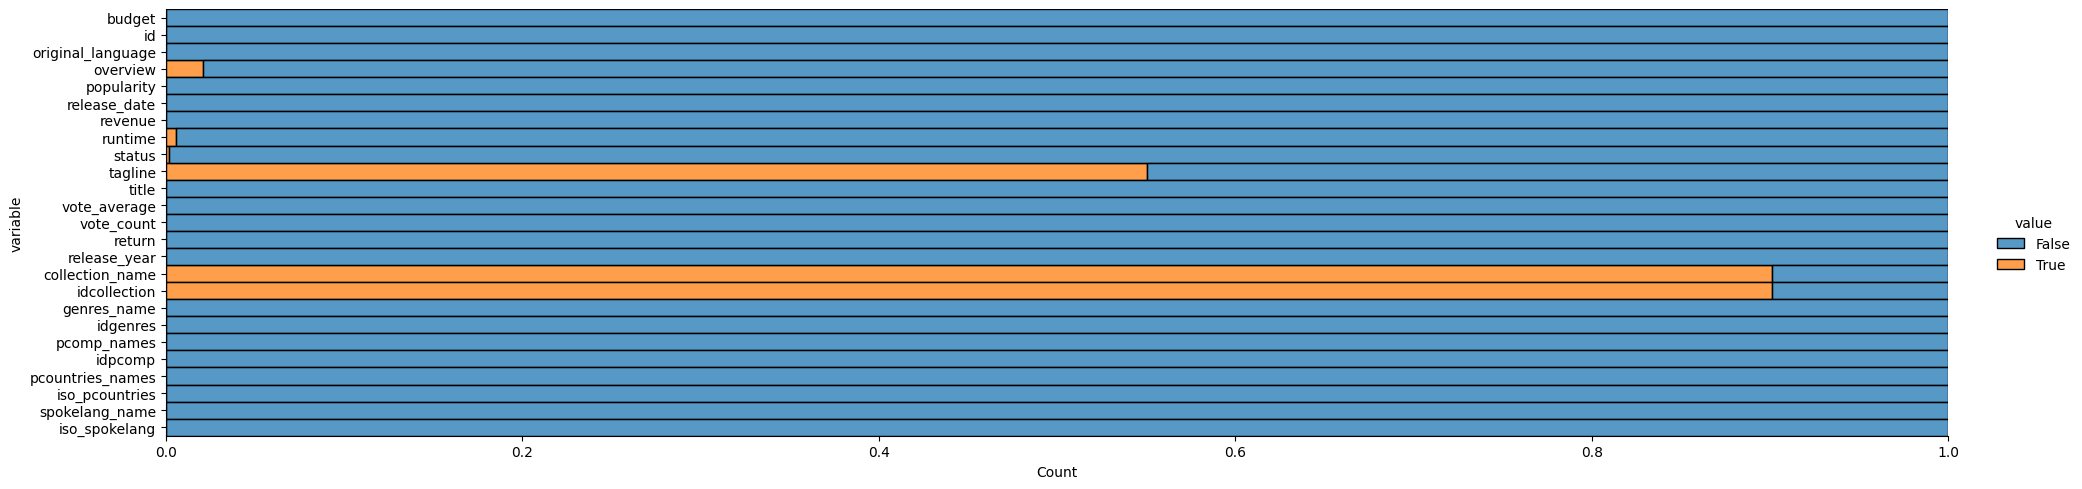

In [25]:
(
    movies_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=4
            )
        )
    )
)
plt.show()

Adicional de las indicaciones realizadas en el MVP se realiza la eliminacion de las siguientes columnas ya que como se muestra en la grafica anterior contienen muchos valores nulos lo cual no infiere en el analisis

In [26]:
movies_df.drop(columns=['collection_name'], inplace=True)
movies_df.drop(columns=['idcollection'], inplace=True)
movies_df.drop(columns=['tagline'], inplace=True)

belongs_to_collection: Se elimina por la gran cantidad de valores nulos<br>
tagline: Se elimina por la gran cantidad de valores nulos



In [27]:
movies_df['budget']=pd.to_numeric(movies_df['budget'],downcast='float',errors='coerce')
movies_df['budget']=movies_df['budget'].fillna(0)

Transformacion de tipos de variables

In [28]:
movies_df['id']=pd.to_numeric(movies_df['id'],downcast='integer',errors='coerce')
movies_df['id']=movies_df['id'].fillna(0)


In [29]:
movies_df['popularity']=pd.to_numeric(movies_df['popularity'],downcast='float',errors='coerce')
movies_df['popularity']=movies_df['popularity'].fillna(0)

In [30]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45346 non-null  float64       
 1   id                 45346 non-null  int32         
 2   original_language  45335 non-null  object        
 3   overview           44405 non-null  object        
 4   popularity         45346 non-null  float32       
 5   release_date       45346 non-null  datetime64[ns]
 6   revenue            45346 non-null  float64       
 7   runtime            45100 non-null  float64       
 8   status             45266 non-null  object        
 9   title              45346 non-null  object        
 10  vote_average       45346 non-null  float64       
 11  vote_count         45346 non-null  float64       
 12  return             45346 non-null  float64       
 13  release_year       45346 non-null  int64         
 14  genres

In [31]:
movies_df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,return,release_year,genres_name,idgenres,pcomp_names,idpcomp,pcountries_names,iso_pcountries,spokelang_name,iso_spokelang
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,12.451801,1995,"[Animation, Comedy, Family]","[16, 35, 10751]",[Pixar Animation Studios],[3],[United States of America],[US],[English],[en]
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,...,4.043035,1995,"[Adventure, Fantasy, Family]","[12, 14, 10751]","[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]",[United States of America],[US],"[English, FranÃ§ais]","[en, fr]"
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,0.000000,1995,"[Romance, Comedy]","[10749, 35]","[Warner Bros., Lancaster Gate]","[6194, 19464]",[United States of America],[US],[English],[en]


### 2.5 ETL DATASET CREDITS

In [32]:
credits_df.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [33]:
credits_df.shape

(45476, 3)

In [34]:
credits_df.drop_duplicates(subset='id', inplace=True)
credits_df.shape

(45432, 3)

In [35]:
# Función para extraer los nombres de 'name' en cada lista de diccionarios
def extract_names(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    names = [entry['name'] for entry in row]
    return names

# Función para extraer los valores de 'id' en cada lista de diccionarios
def extract_ids(row):
    if isinstance(row, str):
        row = ast.literal_eval(row)
    ids = [entry['id'] for entry in row]
    return ids

In [36]:
# Aplicar la función a la columna 'data' para crear una nueva columna 'names'
credits_df['namescast'] = credits_df['cast'].apply(extract_names)

# Aplicar la función a la columna 'data' para crear una nueva columna 'ids'
credits_df['idcast'] = credits_df['cast'].apply(extract_ids)

In [37]:
# Convertir los datos de la columna 'crew' en una lista de diccionarios
credits_df['crew'] = credits_df['crew'].apply(eval)

# Función para extraer los campos 'Director' y 'name'
def extract_director_name(crew_data):
    directors = []
    for member in crew_data:
        if member['job'] == 'Director':
            directors.append(member['name'])
    return directors

In [38]:
# Aplicar la función a la columna 'crew' y guardar los resultados en una nueva columna 'directors'
credits_df['directors'] = credits_df['crew'].apply(extract_director_name)

In [39]:
credits_df.drop(columns=['cast','crew'], inplace=True)

In [40]:
credits_df.head(3)

,id,namescast,idcast,directors
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...",[John Lasseter]
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...",[Joe Johnston]
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[6837, 3151, 13567, 16757, 589, 16523, 7166]",[Howard Deutch]


-------------------------

### 2.6 Generar Dataset ETL

In [41]:
movies_df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,return,release_year,genres_name,idgenres,pcomp_names,idpcomp,pcountries_names,iso_pcountries,spokelang_name,iso_spokelang
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,12.451801,1995,"[Animation, Comedy, Family]","[16, 35, 10751]",[Pixar Animation Studios],[3],[United States of America],[US],[English],[en]
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Jumanji,...,4.043035,1995,"[Adventure, Fantasy, Family]","[12, 14, 10751]","[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]",[United States of America],[US],"[English, FranÃ§ais]","[en, fr]"
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,0.000000,1995,"[Romance, Comedy]","[10749, 35]","[Warner Bros., Lancaster Gate]","[6194, 19464]",[United States of America],[US],[English],[en]


In [42]:
credits_df.head(3)

,id,namescast,idcast,directors
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[31, 12898, 7167, 12899, 12900, 7907, 8873, 11...",[John Lasseter]
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2157, 8537, 205, 145151, 5149, 10739, 58563, ...",[Joe Johnston]
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[6837, 3151, 13567, 16757, 589, 16523, 7166]",[Howard Deutch]


In [43]:
etl_df=pd.merge(movies_df, credits_df, left_on='id', right_on='id')

Importando el Dataset consolidado

In [44]:
etl_df.to_csv('DATASET\Movies_ETL_ILB.csv',index=False)

### 2.7 Limpieza de caracteres

In [45]:
etlmovies_df=pd.read_csv('DATASET\Movies_ETL_ILB.csv',encoding='Latin-1')
etlmovies_df = etlmovies_df.replace("\[", '', regex=True)
etlmovies_df = etlmovies_df.replace("\]", '', regex=True)
etlmovies_df = etlmovies_df.replace("'", '', regex=True)
etlmovies_df = etlmovies_df.replace('"', '', regex=True)
etlmovies_df.to_csv('DATASET\Movies_ETL_ILB.csv',index=False)

In [46]:
etlmovies_df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,...,idgenres,pcomp_names,idpcomp,pcountries_names,iso_pcountries,spokelang_name,iso_spokelang,namescast,idcast,directors
0,30000000.0,862,en,"Led by Woody, Andys toys live happily in his r...",21.946943,1995-10-30,373554033.0,81.0,Released,Toy Story,...,"16, 35, 10751",Pixar Animation Studios,3,United States of America,US,English,en,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...",John Lasseter
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015540,1995-12-15,262797249.0,104.0,Released,Jumanji,...,"12, 14, 10751","TriStar Pictures, Teitler Film, Interscope Com...","559, 2550, 10201",United States of America,US,"English, FranÃÂ§ais","en, fr","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...",Joe Johnston
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Grumpier Old Men,...,"10749, 35","Warner Bros., Lancaster Gate","6194, 19464",United States of America,US,English,en,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","6837, 3151, 13567, 16757, 589, 16523, 7166",Howard Deutch


## 3 CONCLUSIONES Y RECOMENDACIONES

- Conforme a lo descrito en el numeral 2, se realizo el Cargue, Extranccion, Limpieza y Carga de los datasets, siguiendo los parametros definidos por HENRY en el MPV, se cumplieron con todos los objetivos, si bien se dificulto en la estranccion de los disccionarios, asi como de las listas de diccionarios, se crearon nuevas columnas y del mismo modo se eliminaron otras, con el criterio personal a lo que apunta el objetivo del PI el cual es realizar un sistema de recomendaciones, se aliminaron algunas columnas las cuales contenian un gran numero de valores nulos, o dado el caso en el EDA no aportaran ningun valor agregado.

- Para el siguiente paso se recomienda realizar el EDA, completando los valores de las veriables numericas y generar los API's de consulta codificar como se dijo anteriormente el sistema de recomendaciones  con tecnicas de Machine Learning, sin antes decir que nuestra variable Objetivo seria TITULO, lo cual se verificara en el EDA.

----------------------

# Sesion Info

In [47]:
session_info.show()

In [48]:
etlmovies_df.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'return', 'release_year', 'genres_name', 'idgenres',
       'pcomp_names', 'idpcomp', 'pcountries_names', 'iso_pcountries',
       'spokelang_name', 'iso_spokelang', 'namescast', 'idcast', 'directors'],
      dtype='object')